In [1]:
import earthkit.data
import earthkit.plots
import earthkit.plots.quickplot as qplot
import earthkit.aggregate

import xarray as xr

xr.set_options(keep_attrs=True)

earthkit.data.settings.set("cache-policy", "user")

/Users/mavj/opt/miniconda3/envs/DEVELOP/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [21]:
MODELS = ['inm_cm5_0', 'inm_cm4_8', 'ipsl_cm6a_lr', 
          'miroc_es2l', 'mpi_esm1_2_lr']

In [22]:
data = []

for model in MODELS:
    print(model)
    data.append(
        earthkit.data.from_source(
            "cds",
                'projections-cmip6',
            {
                'format': 'zip',
                'temporal_resolution': 'monthly',
                'experiment': 'historical',
                'variable': 'near_surface_air_temperature',
                'model': model,
                'year': [str(year) for year in range(1850, 2015)],
                'month': [
                    '01', '02', '03',
                    '04', '05', '06',
                    '07', '08', '09',
                    '10', '11', '12',
                ],
            },
        ).to_xarray().tas
    )

2024-06-04 09:51:25,560 WARNING Unknown file type, no reader available. path=/var/folders/vt/7j2c2tmx4m14gn_sg3zpf5l00000gn/T/earthkit-data-mavj/cds-ba8c2f2cd22cc66ea725f593f9d38d60085e61c81447c859f1ac0394d03b8d20.d/adaptor.esgf_wps.retrieve-1717488928.4750855-4357-19-2e18a4eb-6297-4f66-b335-99306a79592b_provenance.png magic=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x1ba\x00\x00\x03\x1e\x08\x06\x00\x00\x00\x80M)\xa5\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddy' content_type=None
2024-06-04 09:51:25,580 WARNING Unknown file type, no reader available. path=/var/folders/vt/7j2c2tmx4m14gn_sg3zpf5l00000gn/T/earthkit-data-mavj/cds-07cb028c2d6dd5021f998e7bc04ca96cde03aaeb01ec20a250481df2460cf9e7.d/adaptor.esgf_wps.retrieve-1717489034.6937804-14866-19-967df440-2dc8-4141-8e8c-9498ce212552_provenance.png magic=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x1ba\x00\x00\x03\x1e\x08\x06\x00\x00\x00\x80M)\xa5\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\x

inm_cm5_0
inm_cm4_8
ipsl_cm6a_lr
miroc_es2l
mpi_esm1_2_lr


In [23]:
data = xr.concat(data, dim="model")

TypeError: cannot compare cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True) and Timestamp('1850-01-16 12:00:00') (different calendars)

In [7]:
data

,Array,Chunk
Bytes,6.78 GiB,1.75 MiB
Shape,"(2, 1980, 504, 912)","(1, 1, 504, 912)"
Count,32 Graph Layers,3960 Chunks
Type,float32,numpy.ndarray


In [8]:
yearly = earthkit.aggregate.temporal.resample(data, frequency="Y")

/Users/mavj/opt/miniconda3/envs/DEVELOP/lib/python3.10/site-packages/xarray/core/groupby.py:534: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


In [9]:
timeseries = earthkit.aggregate.spatial.reduce(yearly)

In [10]:
timeseries.max(dim="model")

<xarray.DataArray 'tas_mean' (time: 165)>
array([277.62466, 277.63702, 277.69095, 277.54517, 277.5211 , 277.39713,
       277.42935, 277.50037, 277.361  , 277.449  , 277.50327, 277.2966 ,
       277.36526, 277.19345, 277.35196, 277.31595, 277.31357, 277.48386,
       277.30933, 277.38406, 277.45648, 277.48517, 277.48102, 277.19003,
       277.54138, 277.5026 , 277.40884, 277.52185, 277.47797, 277.37387,
       277.35724, 277.45523, 277.44537, 277.3307 , 276.96927, 276.97018,
       276.9616 , 277.12796, 277.18176, 277.2093 , 277.2484 , 277.25638,
       277.12354, 277.2678 , 277.38016, 277.495  , 277.5017 , 277.5181 ,
       277.56973, 277.5479 , 277.58987, 277.43073, 277.53494, 277.23935,
       277.16235, 277.22232, 277.43167, 277.22787, 277.37027, 277.08813,
       277.4398 , 277.31375, 276.9147 , 276.94058, 276.78976, 277.04086,
       277.3436 , 276.89886, 277.18552, 277.21762, 277.1679 , 277.10092,
       277.0507 , 277.2807 , 277.3451 , 277.3822 , 277.27963, 277.57123,
       277.39548, 277.5064 , 277.4608 , 277.36304, 277.51254, 277.6565 ,
       277.83685, 277.80667, 277.79526, 277.57904, 277.57153, 277.59726,
       277.6138 , 277.78052, 277.7291 , 277.5563 , 277.67203, 277.82935,
       277.6854 , 277.532  , 277.43323, 277.5192 , 277.3686 , 277.48636,
       277.68393, 277.63177, 277.57938, 277.5905 , 277.54114, 277.56543,
       277.53406, 277.67935, 277.73972, 277.64902, 277.57135, 277.3777 ,
       277.3014 , 277.29416, 277.29993, 277.42993, 277.59766, 277.543  ,
       277.46893, 277.41455, 277.4679 , 277.62   , 277.47253, 277.51138,
       277.64078, 277.57446, 277.55045, 277.77682, 277.44656, 277.64197,
       277.71945, 277.48996, 277.54733, 277.72958, 277.89963, 277.56723,
       277.50092, 277.7478 , 277.7307 , 277.74478, 277.43335, 277.48532,
       277.70807, 277.80466, 278.0019 , 277.87332, 277.87112, 277.91458,
       278.15387, 278.03278, 278.0404 , 278.2107 , 278.02353, 278.10016,
       278.0398 , 277.98373, 278.17737, 278.02853, 278.17682, 278.37796,
       278.58188, 278.387  , 278.57352], dtype=float32)
Coordinates:
    height   float64 2.0
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-08T06:41:45Z altered by CMOR: Treated scalar dime...

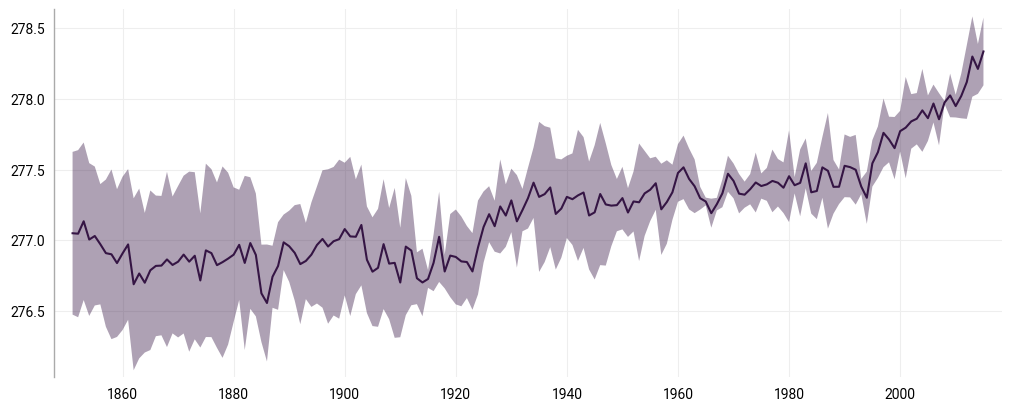

In [11]:
figure = earthkit.plots.Figure(size=(10, 4))
subplot = figure.add_subplot()
subplot.envelope(timeseries.max(dim="model").values, timeseries.min(dim="model").values, x=timeseries.time.values)
subplot.line(y=timeseries.mean(dim="model").values, x=timeseries.time.values)
figure.show()

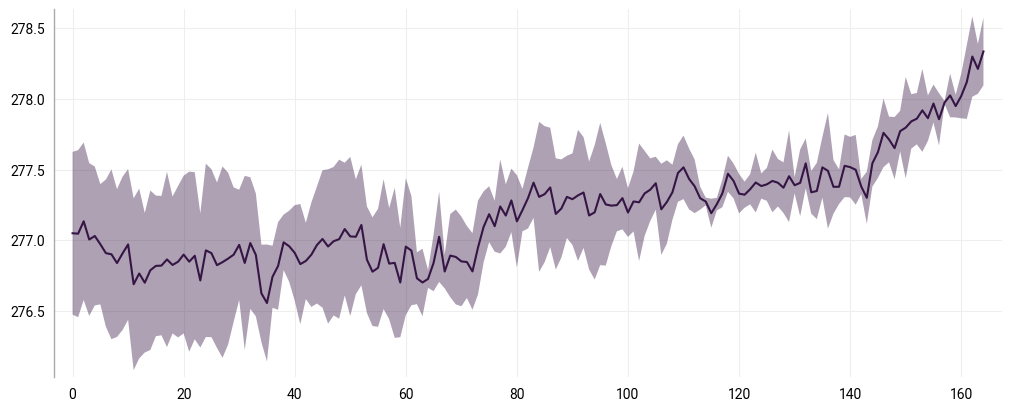

In [12]:
figure = earthkit.plots.Figure(size=(10, 4))
subplot = figure.add_subplot()
subplot.quantiles(timeseries, quantiles=[0, 0.5, 1])
figure.show()

In [13]:
import numpy as np

In [14]:
np.linspace(0, 1, 20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])